In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1)

## a)

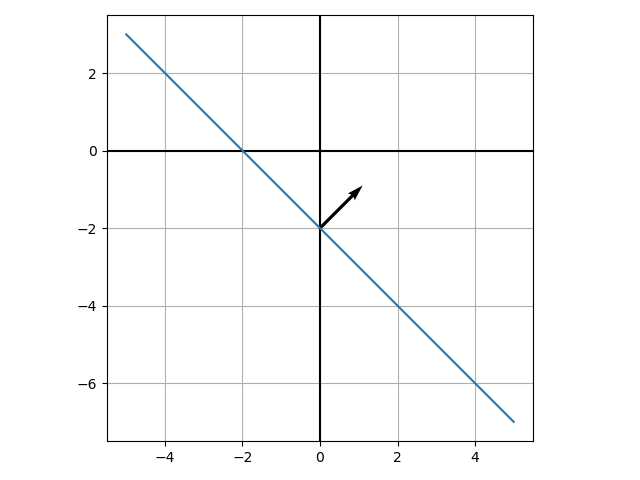

In [2]:
%matplotlib widget
theta = np.array([2,1,1])

ax = plt.figure().add_subplot()
ax.quiver(0, -2, theta[1], theta[2], scale=10)

ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_aspect('equal')

x = np.linspace(-5, 5, 100)

plt.plot(x, -x-2)

plt.tight_layout()

## b)

In [3]:
class resultado():
    def __init__(self, epoch, padrao, saida, classificacao, atualizacao, novo_vetor):
        self.epoch = epoch
        self.padrao = padrao
        self.saida = saida
        self.classificacao = classificacao
        self.atualizacao = atualizacao
        self.novo_vetor = novo_vetor
    
    def __iter__(self):
        return self

    def __next__(self): # Python 2: def next(self)
        self.current += 1
        if self.current < self.high:
            return self.current
        raise StopIteration

def perceptron(data, y, n_iter=100, alpha=0.5):
    w = np.array([1,0,0,0], dtype=float)
    resultados = []
    g = lambda z: 1 if (z > 0) else -1

    for i in range(n_iter):
        erros = 0
        for x,d in zip(data, y):
            saida = g(x@w)
            atualizacao = (alpha*(d - saida))*x
            w = w + atualizacao
            resultados.append((i, x, saida, (d, saida), atualizacao, w))
            if saida != d:
                erros += 1
        if erros == 0:
            break
    return resultados

data = np.array([
    [1,4,3,6],
    [1,2,-2,3],
    [1,1,0,-3],
    [1,4,2,3],
], dtype=float)

y = np.array([-1,1,1,-1])

resultados = perceptron(data, y)

for i in resultados:
    print(i)

(0, array([1., 4., 3., 6.]), 1, (-1, 1), array([-1., -4., -3., -6.]), array([ 0., -4., -3., -6.]))
(0, array([ 1.,  2., -2.,  3.]), -1, (1, -1), array([ 1.,  2., -2.,  3.]), array([ 1., -2., -5., -3.]))
(0, array([ 1.,  1.,  0., -3.]), 1, (1, 1), array([ 0.,  0.,  0., -0.]), array([ 1., -2., -5., -3.]))
(0, array([1., 4., 2., 3.]), -1, (-1, -1), array([0., 0., 0., 0.]), array([ 1., -2., -5., -3.]))
(1, array([1., 4., 3., 6.]), -1, (-1, -1), array([0., 0., 0., 0.]), array([ 1., -2., -5., -3.]))
(1, array([ 1.,  2., -2.,  3.]), -1, (1, -1), array([ 1.,  2., -2.,  3.]), array([ 2.,  0., -7.,  0.]))
(1, array([ 1.,  1.,  0., -3.]), 1, (1, 1), array([ 0.,  0.,  0., -0.]), array([ 2.,  0., -7.,  0.]))
(1, array([1., 4., 2., 3.]), -1, (-1, -1), array([0., 0., 0., 0.]), array([ 2.,  0., -7.,  0.]))
(2, array([1., 4., 3., 6.]), -1, (-1, -1), array([0., 0., 0., 0.]), array([ 2.,  0., -7.,  0.]))
(2, array([ 1.,  2., -2.,  3.]), 1, (1, 1), array([ 0.,  0., -0.,  0.]), array([ 2.,  0., -7.,  0.]))

In [4]:
df = pd.DataFrame(columns=["época", "padrão", "saída", "classificação", "atualização", "novo vetor pesos"])
for i, res in enumerate(resultados):
    df.loc[i] = res

encode_res = {(-1,1): "falso positivo", (1,-1): "falso negativo", (1,1): "verdadeiro positivo", (-1,-1): "verdadeiro negativo"}
new_column = [encode_res[i] for i in df["classificação"]]
df.drop("classificação", axis=1, inplace=True)
df["classificação"] = new_column

df = df[["época", "padrão", "saída", "classificação", "atualização", "novo vetor pesos"]]
print(df.to_latex(index=False, bold_rows=True))

\begin{tabular}{rlrlll}
\toprule
época & padrão & saída & classificação & atualização & novo vetor pesos \\
\midrule
0 & [1. 4. 3. 6.] & 1 & falso positivo & [-1. -4. -3. -6.] & [ 0. -4. -3. -6.] \\
0 & [ 1.  2. -2.  3.] & -1 & falso negativo & [ 1.  2. -2.  3.] & [ 1. -2. -5. -3.] \\
0 & [ 1.  1.  0. -3.] & 1 & verdadeiro positivo & [ 0.  0.  0. -0.] & [ 1. -2. -5. -3.] \\
0 & [1. 4. 2. 3.] & -1 & verdadeiro negativo & [0. 0. 0. 0.] & [ 1. -2. -5. -3.] \\
1 & [1. 4. 3. 6.] & -1 & verdadeiro negativo & [0. 0. 0. 0.] & [ 1. -2. -5. -3.] \\
1 & [ 1.  2. -2.  3.] & -1 & falso negativo & [ 1.  2. -2.  3.] & [ 2.  0. -7.  0.] \\
1 & [ 1.  1.  0. -3.] & 1 & verdadeiro positivo & [ 0.  0.  0. -0.] & [ 2.  0. -7.  0.] \\
1 & [1. 4. 2. 3.] & -1 & verdadeiro negativo & [0. 0. 0. 0.] & [ 2.  0. -7.  0.] \\
2 & [1. 4. 3. 6.] & -1 & verdadeiro negativo & [0. 0. 0. 0.] & [ 2.  0. -7.  0.] \\
2 & [ 1.  2. -2.  3.] & 1 & verdadeiro positivo & [ 0.  0. -0.  0.] & [ 2.  0. -7.  0.] \\
2 & [ 1.  1.  0. -

## 2)

In [5]:
a = np.array([1,-1,0])
b = np.array([1,0,2])
np.cross(a,b)

array([-2, -2,  1])

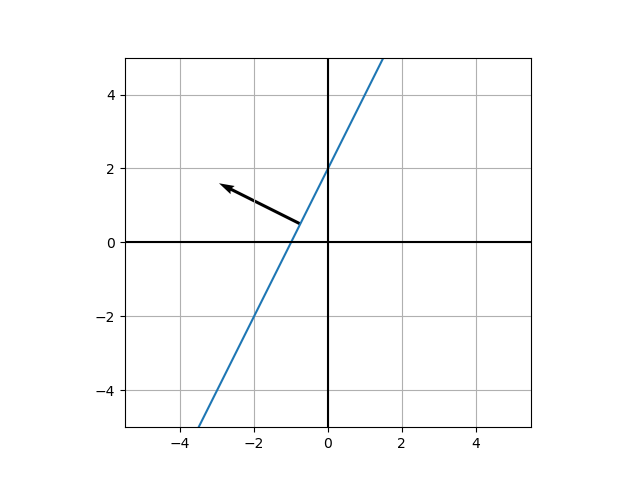

In [6]:
x = np.linspace(-5,5,100)
fig, ax = plt.subplots()
ax.plot(x, 2*x+2)
ax.quiver(-3/4, 1/2, -2, 1, scale=10)
ax.set_aspect('equal')
ax.grid(True, which='both')
ax.set_ylim(-5,5)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

## 3)

In [7]:
def logic_perceptron(a0, a1, a2):
    w = np.array([1.5,1,1])
    v = np.array([a0,a1,a2])
    in_i = w@v
    a_i = 1 if in_i > 0 else 0
    return (v, in_i, a_i)

In [8]:
df3 = pd.DataFrame(columns = ['Input', 'in_i', 'a_i'])
inputs = [(-1,1,1), (-1, 1, 0), (-1,0,1), (-1, 0, 0)]

for i, input in enumerate(inputs):
    df3.loc[i] = logic_perceptron(input[0], input[1], input[2])

print(df3.to_latex())

\begin{tabular}{llrr}
\toprule
 & Input & in_i & a_i \\
\midrule
0 & [-1  1  1] & 0.500000 & 1 \\
1 & [-1  1  0] & -0.500000 & 0 \\
2 & [-1  0  1] & -0.500000 & 0 \\
3 & [-1  0  0] & -1.500000 & 0 \\
\bottomrule
\end{tabular}



## 4)

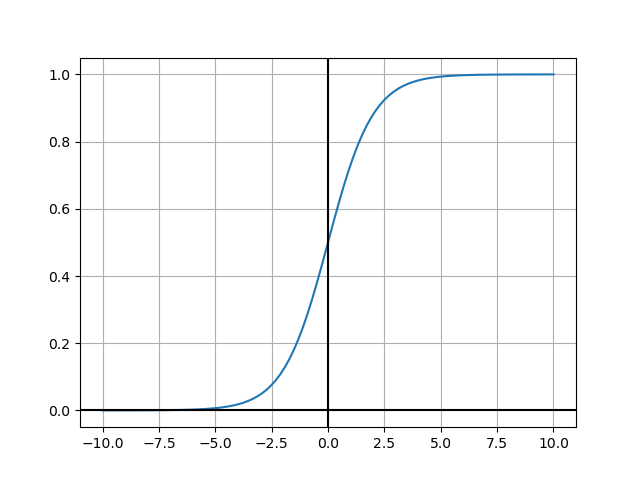

In [10]:
g = lambda x: 1/(1 + np.exp(-x))

fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
plt.plot(x,g(x))
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

## 8)

In [11]:
from numpy.linalg import inv, det

def bhattacharyyaDist(mu_1, sigma_1, mu_2, sigma_2, p1, p2):
    mu_diff = mu_2 - mu_1
    sigma_sum = (sigma_1+sigma_2)/2
    k = ((1/8)*mu_diff.T@inv(sigma_sum)@mu_diff + 
           (1/2)*np.log((det(sigma_sum))/(np.sqrt(det(sigma_1)*det(sigma_2)))))
    return np.sqrt(p1*p2)*np.exp(-k)
    
mu_1 = np.array([-1,-1])
mu_2 = np.array([2,2])
sigma_1 = sigma_2 = np.eye(2)

print(bhattacharyyaDist(mu_1, sigma_1, mu_2, sigma_2, 0.3, 0.7))

0.04829999247443921
